# Lecture 21 – Data 100, Fall 2023

Data 100, Fall 2023

[Acknowledgments Page](https://ds100.org/fa23/acks/)

### Loading the Data
In this lecture, we'll continue our work with the `Dish` table. In the cells below, we connect to the database and query the table.

In [1]:
%load_ext sql

There's a new jupysql version available (0.10.2), you're running 0.8.0. To upgrade: pip install jupysql --upgrade


In [2]:
%%sql
sqlite:///data/basic_examples.db

In [3]:
%%sql
SELECT *
FROM Dish;

Running query in 'sqlite:///data/basic_examples.db'

name,type,cost
ravioli,entree,10
ramen,entree,7
taco,entree,7
edamame,appetizer,4
fries,appetizer,4
potsticker,appetizer,4
ice cream,dessert,5


### Filtering Groups Using `HAVING`

In [4]:
%%sql
SELECT type, COUNT(*)
FROM Dish
GROUP BY type
HAVING MAX(cost) < 8;

Running query in 'sqlite:///data/basic_examples.db'

type,COUNT(*)
appetizer,3
dessert,1


In [5]:
%%sql
SELECT type, MAX(name)
FROM DishDietary
WHERE notes == 'gf'
GROUP BY type
HAVING MAX(cost) <= 7;

Running query in 'sqlite:///data/basic_examples.db'

type,MAX(name)
appetizer,fries
entree,taco


### EDA in SQL

Our typical workflow when working with "big data" is:
* Use SQL to query data from a database
* Use Python (with `pandas`) to analyze this data in detail

We can, however, still perform simple data cleaning and re-structuring using SQL directly. To do so, we'll consider the `Title` table from the IMDB dataset.

In [6]:
%%sql
sqlite:///data/imdbmini.db

In [7]:
%%sql
SELECT *
FROM Title
ORDER BY RANDOM()
LIMIT 10;

Running query in 'sqlite:///data/imdbmini.db'

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1485796,movie,The Greatest Showman,The Greatest Showman,0,2017,None,105,"Biography,Drama,Musical"
96163,movie,The Vanishing,Spoorloos,0,1988,None,107,"Mystery,Thriller"
185937,movie,The Blair Witch Project,The Blair Witch Project,0,1999,None,81,"Horror,Mystery"
117631,movie,Shine,Shine,0,1996,None,105,"Biography,Drama,Music"
1233381,movie,Three Monkeys,Üç Maymun,0,2008,None,109,Drama
831884,movie,Reservation Road,Reservation Road,0,2007,None,102,"Crime,Drama,Thriller"
11318602,tvMiniSeries,Don't F**k with Cats: Hunting an Internet Killer,Don't F**k with Cats: Hunting an Internet Killer,0,2019,2019,187,"Crime,Documentary"
473488,movie,A Guide to Recognizing Your Saints,A Guide to Recognizing Your Saints,0,2006,None,100,"Crime,Drama"
10342730,movie,Spiral,Spiral: From the Book of Saw,0,2021,None,93,"Crime,Horror,Mystery"
421073,movie,Street Kings,Street Kings,0,2008,None,109,"Action,Crime,Drama"


#### Matching Text Using `LIKE`

In [8]:
%%sql
SELECT titleType, primaryTitle
FROM Title
WHERE primaryTitle LIKE "%Star Wars%"

Running query in 'sqlite:///data/imdbmini.db'

titleType,primaryTitle
movie,Star Wars: Episode IV - A New Hope
movie,Star Wars: Episode V - The Empire Strikes Back
movie,Star Wars: Episode VI - Return of the Jedi
movie,Star Wars: Episode I - The Phantom Menace
movie,Star Wars: Episode II - Attack of the Clones
movie,Star Wars: Episode III - Revenge of the Sith
tvSeries,Star Wars: Clone Wars
tvSeries,Star Wars: The Clone Wars
movie,Star Wars: The Clone Wars
movie,Star Wars: Episode VII - The Force Awakens


In [9]:
%%sql
SELECT titleType, primaryTitle
FROM Title
WHERE primaryTitle LIKE "Harry Potter and the Deathly Hallows: Part _"

Running query in 'sqlite:///data/imdbmini.db'

titleType,primaryTitle
movie,Harry Potter and the Deathly Hallows: Part 1
movie,Harry Potter and the Deathly Hallows: Part 2


#### Converting Data Types Using `CAST`

In [10]:
%%sql
SELECT primaryTitle, CAST(runtimeMinutes AS INT)
FROM Title
LIMIT 10;

Running query in 'sqlite:///data/imdbmini.db'

primaryTitle,CAST(runtimeMinutes AS INT)
A Trip to the Moon,13
The Birth of a Nation,195
The Cabinet of Dr. Caligari,76
The Kid,68
Nosferatu,94
Sherlock Jr.,45
Battleship Potemkin,75
The Gold Rush,95
Metropolis,153
The General,67


### Applying Conditions With `CASE`

Here, we return a random order so we can see the various movie ages (otherwise, the top few entries happen to all be old movies).

In [11]:
%%sql
SELECT titleType, startYear,
CASE WHEN startYear < 1950 THEN "old"
     WHEN startYear < 2000 THEN "mid-aged"
     ELSE "new"
     END AS movie_age
FROM Title
ORDER BY RANDOM()
LIMIT 10;

Running query in 'sqlite:///data/imdbmini.db'

titleType,startYear,movie_age
movie,2005,new
movie,2019,new
movie,2010,new
movie,1992,mid-aged
movie,2002,new
movie,2015,new
movie,2012,new
movie,1953,mid-aged
movie,2015,new
movie,2013,new


### Joining Tables

We combine data from multiple tables by performing a **join**. We will explore joins using the cats database, which includes two tables: `s` and `t`.

In [12]:
%%sql
sqlite:///data/basic_examples.db

In [13]:
%%sql
SELECT * FROM s;

Running query in 'sqlite:///data/basic_examples.db'

id,name
0,Apricot
1,Boots
2,Cally
4,Eugene


In [14]:
%%sql
SELECT * FROM t;

Running query in 'sqlite:///data/basic_examples.db'

id,breed
1,persian
2,ragdoll
4,bengal
5,persian


#### Inner Join

In [15]:
%%sql
SELECT s.id, name, breed
FROM s INNER JOIN t ON s.id = t.id;

Running query in 'sqlite:///data/basic_examples.db'

id,name,breed
1,Boots,persian
2,Cally,ragdoll
4,Eugene,bengal


By default, `JOIN`ing without specifying a join type will default to an inner join.

In [16]:
%%sql
SELECT s.id, name, breed
FROM s JOIN t ON s.id = t.id;

Running query in 'sqlite:///data/basic_examples.db'

id,name,breed
1,Boots,persian
2,Cally,ragdoll
4,Eugene,bengal


### Cross Join

In [17]:
%%sql
SELECT *
FROM s CROSS JOIN t;

Running query in 'sqlite:///data/basic_examples.db'

id,name,id_1,breed
0,Apricot,1,persian
0,Apricot,2,ragdoll
0,Apricot,4,bengal
0,Apricot,5,persian
1,Boots,1,persian
1,Boots,2,ragdoll
1,Boots,4,bengal
1,Boots,5,persian
2,Cally,1,persian
2,Cally,2,ragdoll


Equivalently, a cross join can be performed using the following syntax:

In [18]:
%%sql
SELECT *
FROM s, t;

Running query in 'sqlite:///data/basic_examples.db'

id,name,id_1,breed
0,Apricot,1,persian
0,Apricot,2,ragdoll
0,Apricot,4,bengal
0,Apricot,5,persian
1,Boots,1,persian
1,Boots,2,ragdoll
1,Boots,4,bengal
1,Boots,5,persian
2,Cally,1,persian
2,Cally,2,ragdoll


Conceptually, an inner join is equivalent to a cross join where irrelevant rows are removed.

In [19]:
%%sql
SELECT *
FROM s CROSS JOIN t
WHERE s.id = t.id;

Running query in 'sqlite:///data/basic_examples.db'

id,name,id_1,breed
1,Boots,1,persian
2,Cally,2,ragdoll
4,Eugene,4,bengal


#### Left Outer Join

In [20]:
%%sql
SELECT *
FROM s LEFT JOIN t ON s.id = t.id;

Running query in 'sqlite:///data/basic_examples.db'

id,name,id_1,breed
0,Apricot,None,None
1,Boots,1,persian
2,Cally,2,ragdoll
4,Eugene,4,bengal


#### Right Outer Join

In [21]:
%%sql
SELECT *
FROM s RIGHT JOIN t ON s.id = t.id;

Running query in 'sqlite:///data/basic_examples.db'

id,name,id_1,breed
1,Boots,1,persian
2,Cally,2,ragdoll
4,Eugene,4,bengal
None,None,5,persian


#### Full Outer Join

In [22]:
%%sql
SELECT *
FROM s FULL JOIN t ON s.id = t.id;

Running query in 'sqlite:///data/basic_examples.db'

id,name,id_1,breed
0,Apricot,None,None
1,Boots,1,persian
2,Cally,2,ragdoll
4,Eugene,4,bengal
None,None,5,persian


#### Aliasing in Joins

Let's return to the IMDB dataset. Now, we'll consider two tables: `Title` and `Rating`.

In [23]:
%%sql
sqlite:///data/imdbmini.db

When working with tables that have long names, we often create an **alias** using the `AS` keyword (much like we did with columns in the previous lecture). This makes it easier to reference these tables when performing a join.

In [24]:
%%sql
SELECT primaryTitle, averageRating
FROM Title AS T INNER JOIN Rating AS R
ON T.tconst = R.tconst;

Running query in 'sqlite:///data/imdbmini.db'

primaryTitle,averageRating
A Trip to the Moon,8.2
The Birth of a Nation,6.3
The Cabinet of Dr. Caligari,8.1
The Kid,8.3
Nosferatu,7.9
Sherlock Jr.,8.2
Battleship Potemkin,8.0
The Gold Rush,8.2
Metropolis,8.3
The General,8.1


The `AS` keyword is optional – omitting it will still create an alias. We typically include `AS` to make our queries more readable.

In [25]:
%%sql
SELECT primaryTitle, averageRating
FROM Title T INNER JOIN Rating R
ON T.tconst = R.tconst;

Running query in 'sqlite:///data/imdbmini.db'

primaryTitle,averageRating
A Trip to the Moon,8.2
The Birth of a Nation,6.3
The Cabinet of Dr. Caligari,8.1
The Kid,8.3
Nosferatu,7.9
Sherlock Jr.,8.2
Battleship Potemkin,8.0
The Gold Rush,8.2
Metropolis,8.3
The General,8.1


Referencing columns using the full or aliased table name is important to avoid ambiguity. Suppose the tables we are trying to join both include a column with the same name, like the `tconst` columns present in both the `Title` and `Rating` tables of the IMDB database. If we do not specify which table's column we wish to reference, SQL will not be able to process our query.

In the cell below, it is unclear if we are referring to the `tconst` column from the `Title` table or the `tconst` column from the `Rating` table. SQL errors.

In [26]:
%%sql
SELECT primaryTitle, averageRating
FROM Title AS T INNER JOIN Rating AS R
ON tconst = tconst;

Running query in 'sqlite:///data/imdbmini.db'

(sqlite3.OperationalError) ambiguous column name: tconst
[SQL: SELECT primaryTitle, averageRating
FROM Title AS T INNER JOIN Rating AS R
ON tconst = tconst;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

Refer to columns in the format `table_alias.column_name` to avoid ambiguity.

In [27]:
%%sql
SELECT primaryTitle, averageRating
FROM Title AS T INNER JOIN Rating AS R
ON T.tconst = R.tconst;

Running query in 'sqlite:///data/imdbmini.db'

primaryTitle,averageRating
A Trip to the Moon,8.2
The Birth of a Nation,6.3
The Cabinet of Dr. Caligari,8.1
The Kid,8.3
Nosferatu,7.9
Sherlock Jr.,8.2
Battleship Potemkin,8.0
The Gold Rush,8.2
Metropolis,8.3
The General,8.1


## IMDB Case Study

Let's perform our first data science task in SQL – we'll explore the IMDB dataset in further detail.

First, let's understand what tables are present in the database.

In [28]:
%%sql
sqlite:///data/imdbmini.db

In [29]:
%%sql
SELECT tbl_name, sql FROM sqlite_master WHERE type='table'

Running query in 'sqlite:///data/imdbmini.db'

tbl_name,sql
Title,"CREATE TABLE ""Title"" (""tconst"" INTEGER, ""titleType"" TEXT, ""primaryTitle"" TEXT, ""originalTitle"" TEXT, ""isAdult"" TEXT, ""startYear"" TEXT, ""endYear"" TEXT, ""runtimeMinutes"" TEXT, ""genres"" TEXT)"
Name,"CREATE TABLE ""Name"" (""nconst"" INTEGER, ""primaryName"" TEXT, ""birthYear"" TEXT, ""deathYear"" TEXT, ""primaryProfession"" TEXT)"
Role,"CREATE TABLE ""Role"" (tconst INTEGER,ordering TEXT,nconst INTEGER,category TEXT,job TEXT,characters TEXT)"
Rating,"CREATE TABLE ""Rating"" (tconst INTEGER,averageRating TEXT,numVotes TEXT)"


Let's take a closer look at the `Title` table. Below, we preview a few rows of interest.

In [30]:
%%sql
SELECT *
FROM Title
WHERE primaryTitle IN ("Ginny & Georgia", "What If...?", "Succession", "Veep", "Tenet")
LIMIT 10;

Running query in 'sqlite:///data/imdbmini.db'

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
10168312,tvSeries,What If...?,What If...?,0,2021,None,None,"Action,Adventure,Animation"
10813940,tvSeries,Ginny & Georgia,Ginny & Georgia,0,2021,None,None,"Comedy,Drama"
1759761,tvSeries,Veep,Veep,0,2012,2019,28,Comedy
6723592,movie,Tenet,Tenet,0,2020,None,150,"Action,Sci-Fi,Thriller"
7660850,tvSeries,Succession,Succession,0,2018,None,60,Drama


There are a few issues with how this data is stored. Can you spot them?

* We see some rows with **missing** `runtimeMinutes`. This suggests malformed data. We could drop these rows in `pandas` using `[]` or `.dropna()`.

* We also note that the time and year columns are currently given in **string format** (see the schema listed earlier), whereas we probably want them in the format. Again, we could do this conversion in `pandas` using `pd.to_numeric` or `.astype`.


Instead, let's see how we can can do these fixes in SQL. 

In [31]:
%%sql 
SELECT tconst AS id,
  primaryTitle AS title, 
  titleType,
  CAST(runtimeMinutes AS int) AS time,  
  CAST(startYear AS int) AS year
FROM Title
WHERE time > 0 AND -- get rid of outliers and missing values --
      year > 0     -- get rid of missing values --

Running query in 'sqlite:///data/imdbmini.db'

id,title,titleType,time,year
417,A Trip to the Moon,short,13,1902
4972,The Birth of a Nation,movie,195,1915
10323,The Cabinet of Dr. Caligari,movie,76,1920
12349,The Kid,movie,68,1921
13442,Nosferatu,movie,94,1922
15324,Sherlock Jr.,movie,45,1924
15648,Battleship Potemkin,movie,75,1925
15864,The Gold Rush,movie,95,1925
17136,Metropolis,movie,153,1927
17925,The General,movie,67,1926


Perhaps we're interested in only **action movies**. We can refine our query results futher.

In [32]:
%%sql
SELECT tconst AS id,
  primaryTitle AS title, 
  titleType,
  CAST(runtimeMinutes AS int) AS time,  
  CAST(startYear AS int) AS year
FROM Title
WHERE time > 0 AND -- get rid of outliers and missing values --
      year > 0     -- get rid of missing values --
      AND titleType = "movie"
      AND genres LIKE "%Action%";

Running query in 'sqlite:///data/imdbmini.db'

id,title,titleType,time,year
15324,Sherlock Jr.,movie,45,1924
17925,The General,movie,67,1926
23427,Scarface,movie,93,1932
29843,The Adventures of Robin Hood,movie,102,1938
40506,Key Largo,movie,100,1948
40724,Red River,movie,133,1948
42041,White Heat,movie,114,1949
46534,The War of the Worlds,movie,85,1953
47034,Godzilla,movie,96,1954
47478,Seven Samurai,movie,207,1954


If we want to know the critic ratings for each of these action movies, we can join `Title` with the `Rating` table.

In the cell below, we use the **`<<` operator** to store the result of our query as a variable.

In [33]:
%%sql action_movies_sql <<
SELECT T.tconst AS id,
  primaryTitle AS title, 
  titleType,
  CAST(runtimeMinutes AS int) AS time,  
  CAST(startYear AS int) AS year,
  CAST(averageRating AS float) AS rating
FROM Title AS T INNER JOIN Rating AS R ON T.tconst = R.tconst
WHERE time > 0 AND -- get rid of outliers and missing values --
      year > 0     -- get rid of missing values --
      AND titleType = "movie"
      AND genres LIKE "%Action%";

Running query in 'sqlite:///data/imdbmini.db'

Let's look at what we got.

In [34]:
action_movies_sql

id,title,titleType,time,year,rating
15324,Sherlock Jr.,movie,45,1924,8.2
17925,The General,movie,67,1926,8.1
23427,Scarface,movie,93,1932,7.8
29843,The Adventures of Robin Hood,movie,102,1938,7.9
40506,Key Largo,movie,100,1948,7.8
40724,Red River,movie,133,1948,7.8
42041,White Heat,movie,114,1949,8.1
46534,The War of the Worlds,movie,85,1953,7.1
47034,Godzilla,movie,96,1954,7.6
47478,Seven Samurai,movie,207,1954,8.6


A typical workflow for interacting with databases is:

1. Use SQL to query large amounts of data from the database. Perform basic filtering and cleaning operations so we obtain the data we need.
2. Convert the outputted table into a *DataFrame*, then peform more detailed analysis work in `pandas`

We use `.DataFrame()` to convert our SQL table `action_movies` into a `pandas` DataFrame.

In [35]:
action_movies_df = action_movies_sql.DataFrame()
action_movies_df

,id,title,titleType,time,year,rating
0,15324,Sherlock Jr.,movie,45,1924,8.2
1,17925,The General,movie,67,1926,8.1
2,23427,Scarface,movie,93,1932,7.8
3,29843,The Adventures of Robin Hood,movie,102,1938,7.9
4,40506,Key Largo,movie,100,1948,7.8
...,...,...,...,...,...,...
1715,9243946,El Camino: A Breaking Bad Movie,movie,122,2019,7.3
1716,9252468,Mosul,movie,86,2019,7.2
1717,9376612,Shang-Chi and the Legend of the Ten Rings,movie,132,2021,7.9
1718,9691136,Shadow in the Cloud,movie,83,2020,4.9


Now, we can use our usual tools – `pandas`, `numpy`, `matplotlib`, and `seaborn` – to continue our work!

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

How do ratings vary through the years?

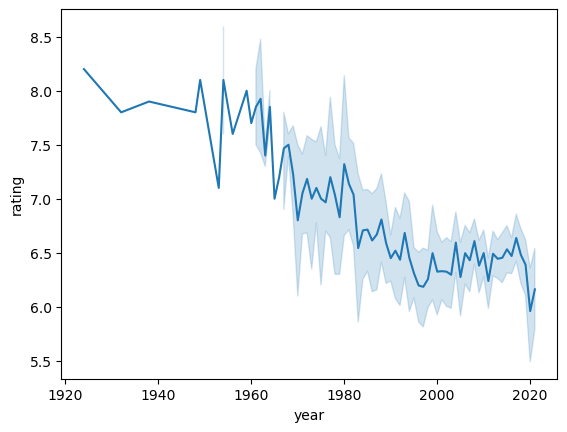

In [37]:
sns.lineplot(data=action_movies_df, x="year", y="rating");

How does the runtime of an action movie influence the rating it receives?

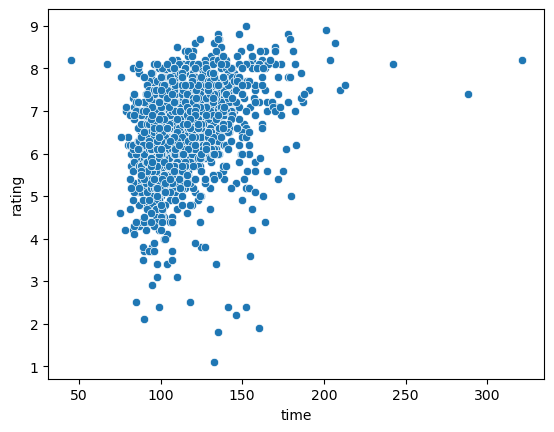

In [38]:
sns.scatterplot(data=action_movies_df, x="time", y="rating");

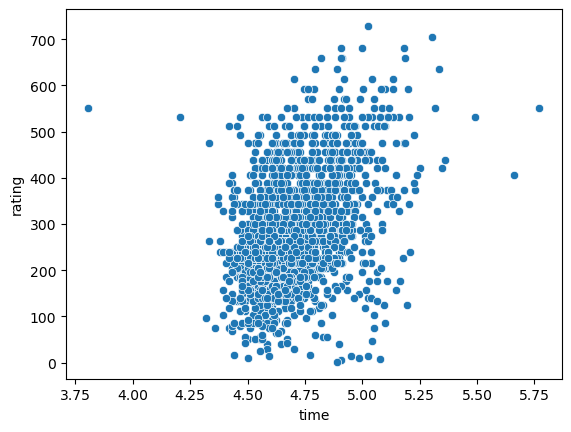

In [39]:
# Apply transformations to linearize the data
sns.scatterplot(x=np.log(action_movies_df["time"]), y=action_movies_df["rating"]**3);

Could we use a movie's runtime to predict its rating?

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


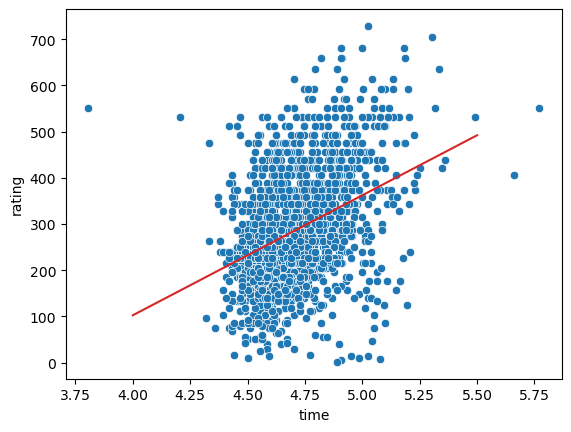

In [40]:
X, Y = np.log(action_movies_df[["time"]]), action_movies_df["rating"]**3

model = lm.LinearRegression()
model.fit(X, Y)

xs = np.linspace(4, 5.5)
plt.plot(xs, model.predict(xs[:, np.newaxis]), c="tab:red")
sns.scatterplot(x=np.log(action_movies_df["time"]), y=action_movies_df["rating"]**3);